In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [61]:
df = pd.read_csv('/home/kiran/D_Drive_backup/DataWorld/Data_Science/datasets/fraud-detection.csv')

In [5]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100165 entries, 0 to 100164
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   step            100165 non-null  int64  
 1   type            100165 non-null  object 
 2   amount          100165 non-null  float64
 3   nameOrig        100165 non-null  object 
 4   oldbalanceOrg   100165 non-null  float64
 5   newbalanceOrig  100165 non-null  float64
 6   nameDest        100165 non-null  object 
 7   oldbalanceDest  100165 non-null  float64
 8   newbalanceDest  100165 non-null  float64
 9   isFraud         100165 non-null  int64  
dtypes: float64(5), int64(2), object(3)
memory usage: 7.6+ MB


In [9]:
df.describe(include='all')

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
count,100165.000000,100165,1.001650e+05,100165,1.001650e+05,1.001650e+05,100165,1.001650e+05,1.001650e+05,100165.000000
unique,NaN,5,NaN,100165,NaN,NaN,51607,NaN,NaN,NaN
top,NaN,PAYMENT,NaN,C1231006815,NaN,NaN,C985934102,NaN,NaN,NaN
freq,NaN,39552,NaN,1,NaN,NaN,78,NaN,NaN,NaN
mean,8.502112,NaN,1.736458e+05,NaN,8.801756e+05,8.965348e+05,NaN,8.810839e+05,1.184639e+06,0.001158
std,1.825055,NaN,3.442910e+05,NaN,2.676095e+06,2.714232e+06,NaN,2.402387e+06,2.802252e+06,0.034011
min,1.000000,NaN,3.200000e-01,NaN,0.000000e+00,0.000000e+00,NaN,0.000000e+00,0.000000e+00,0.000000
25%,8.000000,NaN,9.970160e+03,NaN,0.000000e+00,0.000000e+00,NaN,0.000000e+00,0.000000e+00,0.000000
50%,9.000000,NaN,5.285289e+04,NaN,2.008500e+04,0.000000e+00,NaN,2.091500e+04,5.048120e+04,0.000000
75%,10.000000,NaN,2.119434e+05,NaN,1.910560e+05,2.154246e+05,NaN,5.891912e+05,1.061043e+06,0.000000


In [10]:
df['step'].value_counts()

9     37628
10    27439
8     21097
7      6837
1      2708
6      1660
2      1014
5       665
4       565
3       552
Name: step, dtype: int64

In [62]:
type_vc = df['type'].value_counts()
type_vc

PAYMENT     39552
CASH_OUT    30772
CASH_IN     20248
TRANSFER     8603
DEBIT         990
Name: type, dtype: int64

In [64]:
type_vc.index

Index(['PAYMENT', 'CASH_OUT', 'CASH_IN', 'TRANSFER', 'DEBIT'], dtype='object')

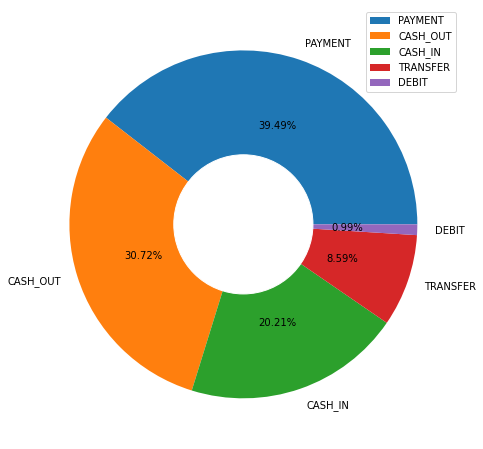

In [77]:
plt.figure(figsize=(8,8))
plt.pie(x=type_vc.values,labels=type_vc.index,autopct='%1.2f%%')
plt.legend()
my_circle=plt.Circle( (0,0), 0.4, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)

In [12]:
df[df.isna()].sum()

step              0.0
type                0
amount            0.0
nameOrig            0
oldbalanceOrg     0.0
newbalanceOrig    0.0
nameDest            0
oldbalanceDest    0.0
newbalanceDest    0.0
isFraud           0.0
dtype: object

In [18]:
types = pd.get_dummies(df['type'])

In [23]:
df = pd.concat([types,df],axis=1)

In [24]:
df

,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,0,0,0,1,0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.00,0.00,0
1,0,0,0,1,0,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.00,0.00,0
2,0,0,0,0,1,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.00,0.00,1
3,0,1,0,0,0,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.00,0.00,1
4,0,0,0,1,0,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.00,0.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100160,1,0,0,0,0,10,CASH_IN,61054.02,C1657461053,11600000.0,11700000.00,C622723232,1054868.85,993814.83,0
100161,1,0,0,0,0,10,CASH_IN,347608.07,C199435243,11700000.0,12000000.00,C1029211742,1814256.11,3246825.50,0
100162,1,0,0,0,0,10,CASH_IN,68846.64,C975194954,12000000.0,12100000.00,C355970563,1622436.37,2287253.07,0
100163,1,0,0,0,0,10,CASH_IN,48078.78,C1122979545,12100000.0,12200000.00,C589884531,410069.03,161779.60,0


<AxesSubplot:>

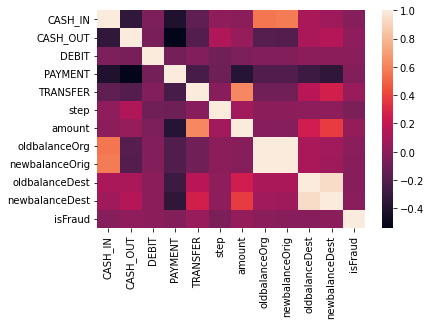

In [25]:
import seaborn as sns
sns.heatmap(df.corr())

In [26]:
df.columns

Index(['CASH_IN', 'CASH_OUT', 'DEBIT', 'PAYMENT', 'TRANSFER', 'step', 'type',
       'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig', 'nameDest',
       'oldbalanceDest', 'newbalanceDest', 'isFraud'],
      dtype='object')

In [32]:
df = df.drop(['type','nameOrig','nameDest'],axis=1)

In [33]:
df.head()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,1,9839.64,170136.0,160296.36,0.0,0.0,0
1,1,1864.28,21249.0,19384.72,0.0,0.0,0
2,1,181.00,181.0,0.00,0.0,0.0,1
3,1,181.00,181.0,0.00,21182.0,0.0,1
4,1,11668.14,41554.0,29885.86,0.0,0.0,0


In [36]:
X = df.drop('isFraud',axis=1)
X

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
0,1,9839.64,170136.0,160296.36,0.00,0.00
1,1,1864.28,21249.0,19384.72,0.00,0.00
2,1,181.00,181.0,0.00,0.00,0.00
3,1,181.00,181.0,0.00,21182.00,0.00
4,1,11668.14,41554.0,29885.86,0.00,0.00
...,...,...,...,...,...,...
100160,10,61054.02,11600000.0,11700000.00,1054868.85,993814.83
100161,10,347608.07,11700000.0,12000000.00,1814256.11,3246825.50
100162,10,68846.64,12000000.0,12100000.00,1622436.37,2287253.07
100163,10,48078.78,12100000.0,12200000.00,410069.03,161779.60


In [37]:
y = df['isFraud']
y

0         0
1         0
2         1
3         1
4         0
         ..
100160    0
100161    0
100162    0
100163    0
100164    0
Name: isFraud, Length: 100165, dtype: int64

<AxesSubplot:>

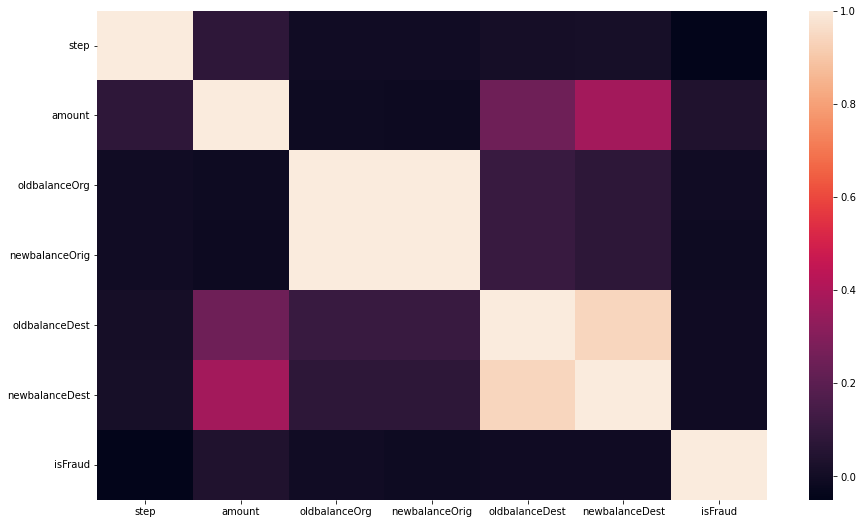

In [38]:
import seaborn as sns
plt.figure(figsize=(15,9))
sns.heatmap(df.corr())

In [39]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_sc = sc.fit_transform(X)

In [40]:
X_sc[:1]

array([[-4.11064284, -0.47578063, -0.2653281 , -0.27125245, -0.36675544,
        -0.42274735]])

In [41]:
from sklearn.model_selection import train_test_split

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X_sc,y, test_size=0.2, random_state=5)

## We can try two Modeling approaching. firt we can try NaiveBayes

In [43]:
from sklearn.naive_bayes import GaussianNB

In [44]:
nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB()

In [45]:
y_pred = nb.predict(X_test)

In [46]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

In [47]:
cm = confusion_matrix(y_test, y_pred)

In [48]:
cm

array([[19190,   818],
       [   18,     7]])

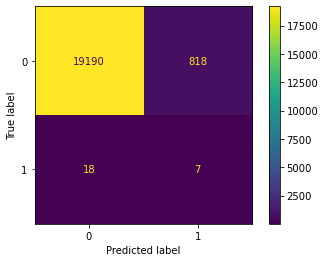

In [49]:
cmd = ConfusionMatrixDisplay(cm)
cmd.plot()

In [50]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98     20008
           1       0.01      0.28      0.02        25

    accuracy                           0.96     20033
   macro avg       0.50      0.62      0.50     20033
weighted avg       1.00      0.96      0.98     20033



In [51]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9582688563869615

## Next we can also try KNN Classifier

In [52]:
from sklearn.neighbors import KNeighborsClassifier

In [53]:
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [54]:
y_pred = knn.predict(X_test)

In [55]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

In [56]:
cm = confusion_matrix(y_test, y_pred)

In [57]:
cm

array([[20008,     0],
       [   22,     3]])

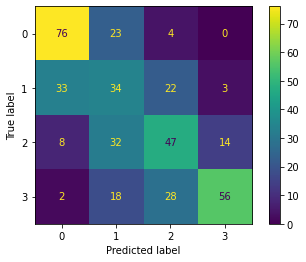

In [49]:
cmd = ConfusionMatrixDisplay(cm)
cmd.plot()

In [58]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     20008
           1       1.00      0.12      0.21        25

    accuracy                           1.00     20033
   macro avg       1.00      0.56      0.61     20033
weighted avg       1.00      1.00      1.00     20033



In [59]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9989018120101832

# Conclusion 

## As accuracy_score is better for KNN, we can proceed with KNN based predictions